# UK Happiness Data

In [ ]:
#data from https://www.kaggle.com/wrcarson/happiness-data-uk-office-for-national-statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('HappinessData.csv')

In [3]:
df.head()

,Area,Happiness,Year,No Religion (%),No Sport,Childhood Obesity,CPP,Suicide Rates,Road Accidents,Crime Rates
0,City of London,x,2011,-,59.40%,NaN,21,3,NaN,NaN
1,Barking and Dagenham,6.91,2011,19.2,61.10%,26.9,55,10,NaN,100.7
2,Barnet,7.26,2011,20.0,49.20%,19.2,27,22,NaN,73.5
3,Bexley,7.22,2011,25.0,51.00%,22.2,16,16,NaN,52.3
4,Brent,7.07,2011,11.7,61.20%,22.6,37,20,NaN,101.2


In [4]:
df.describe()

,Year,Childhood Obesity,Suicide Rates,Road Accidents,Crime Rates
count,198.000000,192.000000,198.000000,66.000000,192.000000
mean,2013.500000,22.452083,17.904040,4.722727,86.993750
std,1.712154,3.505911,7.364056,7.559381,35.552238
min,2011.000000,11.100000,0.000000,1.800000,45.000000
25%,2012.000000,20.600000,13.000000,2.800000,65.625000
50%,2013.500000,22.900000,18.000000,3.300000,78.600000
75%,2015.000000,24.825000,22.000000,3.800000,100.100000
max,2016.000000,29.600000,45.000000,48.100000,302.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 10 columns):
Area                 198 non-null object
Happiness            198 non-null object
Year                 198 non-null int64
No Religion (%)      198 non-null object
No Sport             198 non-null object
Childhood Obesity    192 non-null float64
CPP                  198 non-null object
Suicide Rates        198 non-null int64
Road Accidents       66 non-null float64
Crime Rates          192 non-null float64
dtypes: float64(3), int64(2), object(5)
memory usage: 15.5+ KB


In [6]:
#Very little data in the road accidents column (only 2015/16), should probably drop it
df.drop('Road Accidents', axis=1, inplace=True)

In [7]:
#And will have to convert string columns into numerical: Happiness, No Religion, No Sport, CPP

In [8]:
df['Happiness'] = pd.to_numeric(df.Happiness, errors='coerce')
df[df['Happiness'].isnull()]

,Area,Happiness,Year,No Religion (%),No Sport,Childhood Obesity,CPP,Suicide Rates,Crime Rates
0,City of London,NaN,2011,-,59.40%,NaN,21,3,NaN
33,City of London,NaN,2012,-,48.50%,NaN,102,1,NaN
66,City of London,NaN,2013,-,42.00%,NaN,x,1,NaN
99,City of London,NaN,2014,-,39.20%,NaN,x,2,NaN
132,City of London,NaN,2015,-,53.50%,NaN,x,1,NaN
165,City of London,NaN,2016,-,61.90%,NaN,x,0,NaN


In [9]:
#Seems only London is missing the hapiness data. Maybe we should aim to try and predict it. Lets drop from data for now:

In [10]:
london_df = df[df.Area == 'City of London']
df = df[df.Area != 'City of London']

In [11]:
#and fix up the other non numerical, starting with stripping that % sign:

In [12]:
df['No Sport'] = df['No Sport'].str.strip('%')

In [13]:
cols_to_change_to_num = ['Happiness','No Religion (%)','No Sport','CPP','Crime Rates']
df[cols_to_change_to_num] = df[cols_to_change_to_num].apply(pd.to_numeric, errors='coerce')
df[df.isnull().any(axis=1)]

,Area,Happiness,Year,No Religion (%),No Sport,Childhood Obesity,CPP,Suicide Rates,Crime Rates
48,Havering,7.18,2012,26.5,56.1,19.9,NaN,14,68.7
57,Newham,7.32,2012,10.4,60.4,27.3,NaN,21,101.0


In [14]:
#Not exactly sure what CPP is... could either impute these, or drop? Will drop for now...

In [15]:
df.drop([48,57], axis=0, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 1 to 197
Data columns (total 9 columns):
Area                 190 non-null object
Happiness            190 non-null float64
Year                 190 non-null int64
No Religion (%)      190 non-null float64
No Sport             190 non-null float64
Childhood Obesity    190 non-null float64
CPP                  190 non-null float64
Suicide Rates        190 non-null int64
Crime Rates          190 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 14.8+ KB


In [17]:
#Hooray, all numeric now. 

In [18]:
#Let's have a look at the Happiest towns of 2016

In [19]:
df_2016 = df[df.Year == 2016]
df_2016.nlargest(10, 'Happiness')

,Area,Happiness,Year,No Religion (%),No Sport,Childhood Obesity,CPP,Suicide Rates,Crime Rates
182,Hounslow,7.91,2016,14.1,54.2,24.4,34.0,25,71.3
179,Harrow,7.72,2016,12.9,57.3,20.6,34.0,20,45.5
188,Merton,7.66,2016,30.3,47.5,21.6,30.0,20,53.5
167,Barnet,7.63,2016,23.4,49.3,19.0,30.0,23,55.8
195,Waltham Forest,7.62,2016,22.5,50.1,25.5,38.0,18,64.9
172,Croydon,7.61,2016,27.8,50.0,23.1,39.0,26,67.4
169,Brent,7.59,2016,14.9,57.2,28.3,26.0,20,70.8
185,Kingston upon Thames,7.58,2016,28.8,43.5,15.3,38.0,16,49.6
191,Richmond upon Thames,7.58,2016,35.2,41.8,13.9,26.0,12,49.9
197,Westminster,7.56,2016,29.5,44.1,26.4,21.0,14,171.3


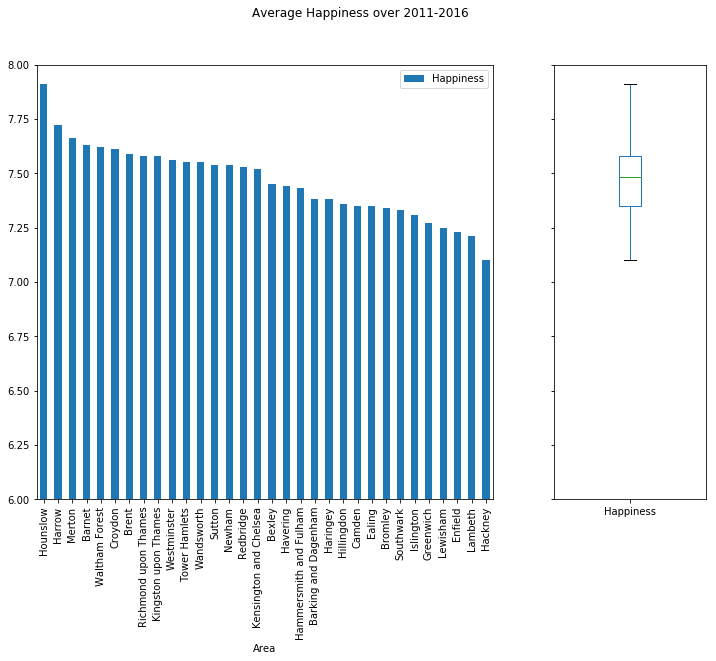

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey=True, figsize=(12,8), gridspec_kw = {'width_ratios':[3, 1]})
plt.suptitle('Average Happiness over 2011-2016')
df_2016[['Area','Happiness']].sort_values(by='Happiness', ascending=False).plot(kind='bar',x='Area',y='Happiness',ax=axes[0])
df_2016[['Area','Happiness']].plot(kind='box',ax=axes[1])
plt.ylim([6,8])
plt.show()

In [21]:
#Relatively even spread in a small range, with Hounslow above the trend, and Hackney below.

In [22]:
#Or shown in a fancy violin plot:

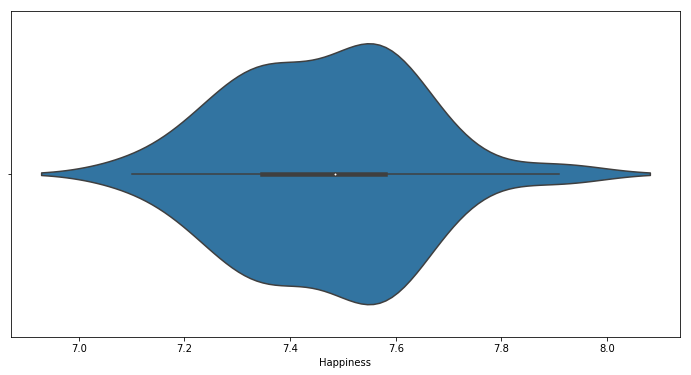

In [23]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df_2016,x='Happiness')

In [24]:
#Not a whole lot of variability... Let's see how happiness has been changing over time

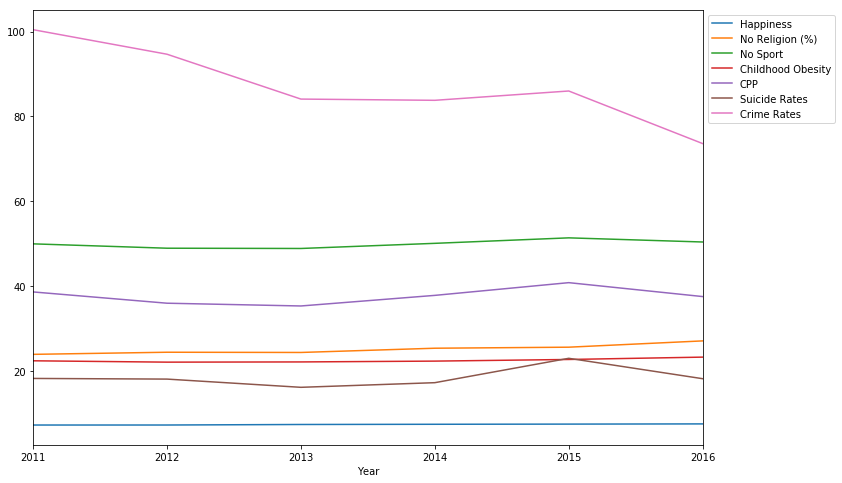

In [25]:
year_trends = df.groupby('Year').mean()
year_trends.plot(figsize=(12,8))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [26]:
#should probably split to better see trends:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000076E0CB6D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000076E527BE0>]], dtype=object)

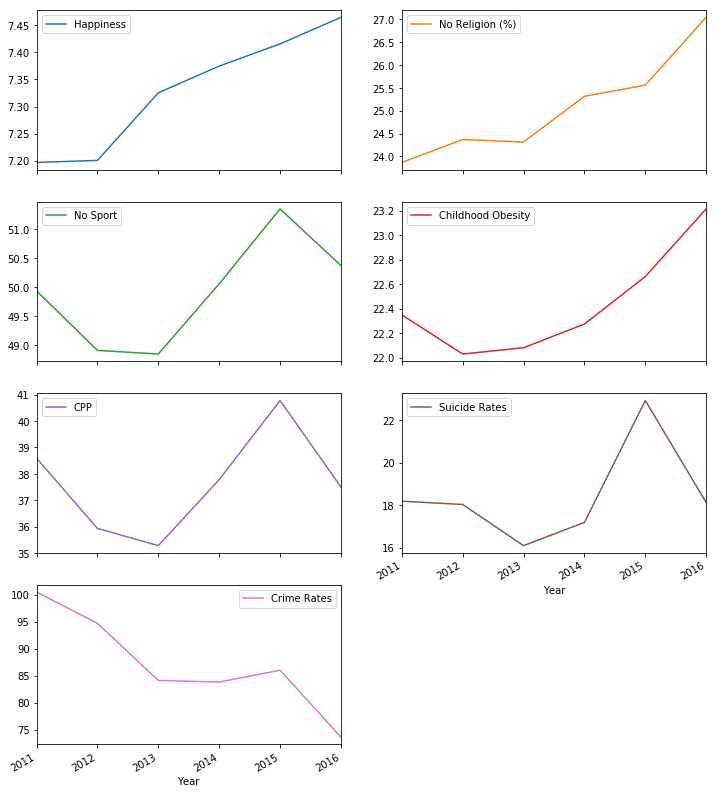

In [27]:
year_trends.plot(subplots=True, layout=(4,2), figsize=(12,15))

In [28]:
#Seems Happiness, No Religion and Childhood obesity have been consistently increasing, while Crime Rates has been decreasing
#Tough to infer anything about the others.

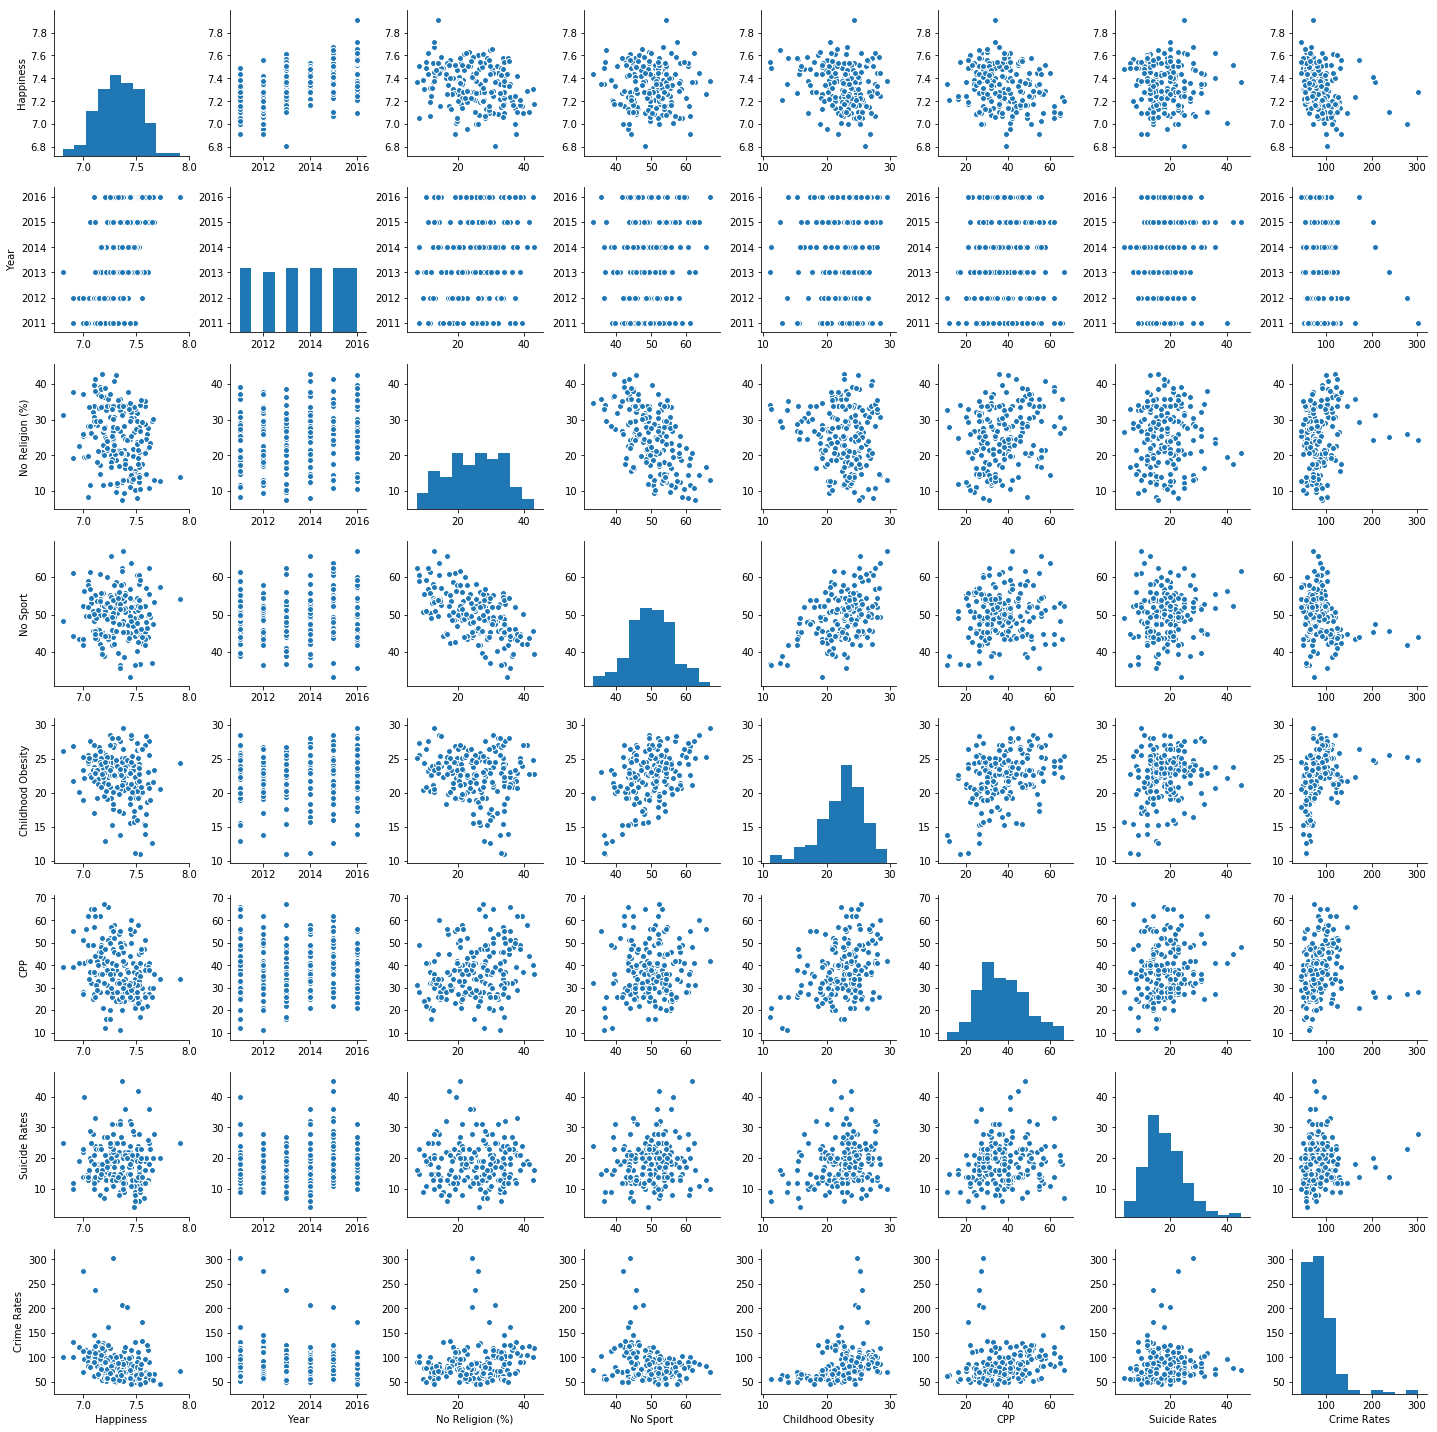

In [29]:
sns.pairplot(df)

In [30]:
#Looking at histograms on the leading diagonal
#Childhood obesity definitely has some negative skew, and Crime Rates has a few higher outliers?

In [34]:
df[df['Crime Rates']>200]

,Area,Happiness,Year,No Religion (%),No Sport,Childhood Obesity,CPP,Suicide Rates,Crime Rates
32,Westminster,7.28,2011,24.4,44.0,24.8,28.0,28,302.0
65,Westminster,7.00,2012,26.1,42.0,25.3,27.0,23,277.0
98,Westminster,7.11,2013,25.1,45.7,25.6,26.0,14,238.3
131,Westminster,7.37,2014,31.3,47.6,24.5,26.0,17,206.9
164,Westminster,7.41,2015,24.2,45.5,24.9,28.0,20,203.1


In [35]:
#Seems like a sketchy neighbourhood maybe... or just more often reported.

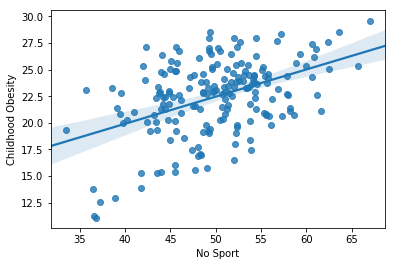

In [31]:
#Looking at scatterplots between differing variables
#pointing out the obvious first: No sport seems to correlate with childhood obesity
sns.regplot(data=df, x='No Sport', y='Childhood Obesity')

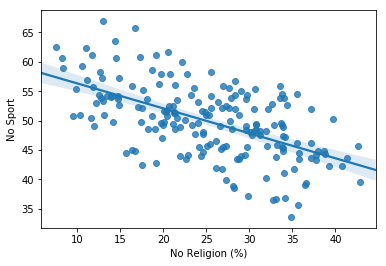

In [32]:
#Atheists are more likely to play sport?
#or are sporty people more likely to be atheists? 
#possibly, religion tied to age, older less likely to sport
sns.regplot(data=df, x='No Religion (%)', y='No Sport')

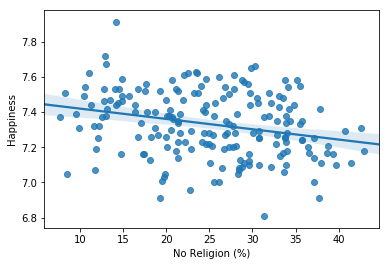

In [33]:
#Not so well defined, but bit of a correlation between No religion and Happiness:
#Less religion = Less happy?
sns.regplot(data=df, x='No Religion (%)', y='Happiness')

In [36]:
df.corr()

,Happiness,Year,No Religion (%),No Sport,Childhood Obesity,CPP,Suicide Rates,Crime Rates
Happiness,1.000000,0.537531,-0.262901,0.011239,-0.242370,-0.247764,0.004907,-0.314613
Year,0.537531,1.000000,0.120868,0.084909,0.089441,0.048358,0.110632,-0.220226
No Religion (%),-0.262901,0.120868,1.000000,-0.575411,-0.155349,0.266260,0.000391,0.176788
No Sport,0.011239,0.084909,-0.575411,1.000000,0.446310,0.120416,0.125888,-0.263691
Childhood Obesity,-0.242370,0.089441,-0.155349,0.446310,1.000000,0.361490,0.191000,0.349021
CPP,-0.247764,0.048358,0.266260,0.120416,0.361490,1.000000,0.127915,0.102176
Suicide Rates,0.004907,0.110632,0.000391,0.125888,0.191000,0.127915,1.000000,0.071276
Crime Rates,-0.314613,-0.220226,0.176788,-0.263691,0.349021,0.102176,0.071276,1.000000


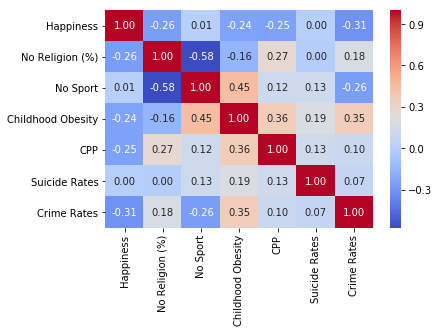

In [37]:
sns.heatmap(df.drop('Year',axis=1).corr(),annot=True, fmt='.2f',cmap='coolwarm')
#Dropping Year from this as it is much more strongly correlated than the others, in order to see other correlations 

In [38]:
#Maybe time to do some machine learning stuff. Clustering? Modelling Happiness from other variables? Predicting London Happiness?